# Sử dụng mạng CNNs cho bài toán phân loại ảnh  
  
    
  
Hiện nay deep learning cho phép xử lý các tác vụ như phân loại ảnh, nhận diện vật thể, nhận diện tiếng nói... với độ chính xác rất cao và trong thực tế đã vượt qua con người trong một số bài toán cụ thể.   
  
Trong bài viết này tôi sẽ xây dựng một mạng thần kinh huấn luyện nó trên bộ cơ sở dữ liệu Fashion MNIST. Fashion MNIST là bộ dữ liệu ảnh thời trang được chia vào 10 class. Mỗi mẫu là một bức ảnh xám 28x28.  


## Khai báo thư viện  cần thiết 
Chúng ta sẽ xây dựng một mạng CNNs dựa trên thư viện Keras. 

In [0]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Activation, Dropout, Flatten, BatchNormalization
from keras.models import Sequential
from keras.optimizers import SGD, Adam
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
cd gdrive/My\ Drive/Colab\ Notebooks


/content/gdrive/My Drive/Colab Notebooks


## Tải bộ dữ liệu Fahsion MNIST
Bộ dữ liệu gồm 70000 ảnh được chia 60000 mẫu cho tập train và 10000 mẫu cho tập test.

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


## Chia tập validation
Lấy 5000 mẫu trong tập train dùng làm tập validation  
Tập train có:      55000 mẫu  
Tập validation có: 5000 mẫu  
Tập test có:       10000 mẫu

In [0]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

## Khám phá bộ dữ liệu
Fashion MNIST gồm 10 lớp, các lớp chứa số lượng mẫu bằng nhau:
* 0: T-shirt/top;
* 1: Trouser;
* 2: Pullover;
* 3: Dress;
* 4: Coat;
* 5: Sandal;
* 6: Shirt;
* 7: Sneaker;
* 8: Bag;
* 9: Ankle boot.  
  
  
Hiển thị các mẫu :

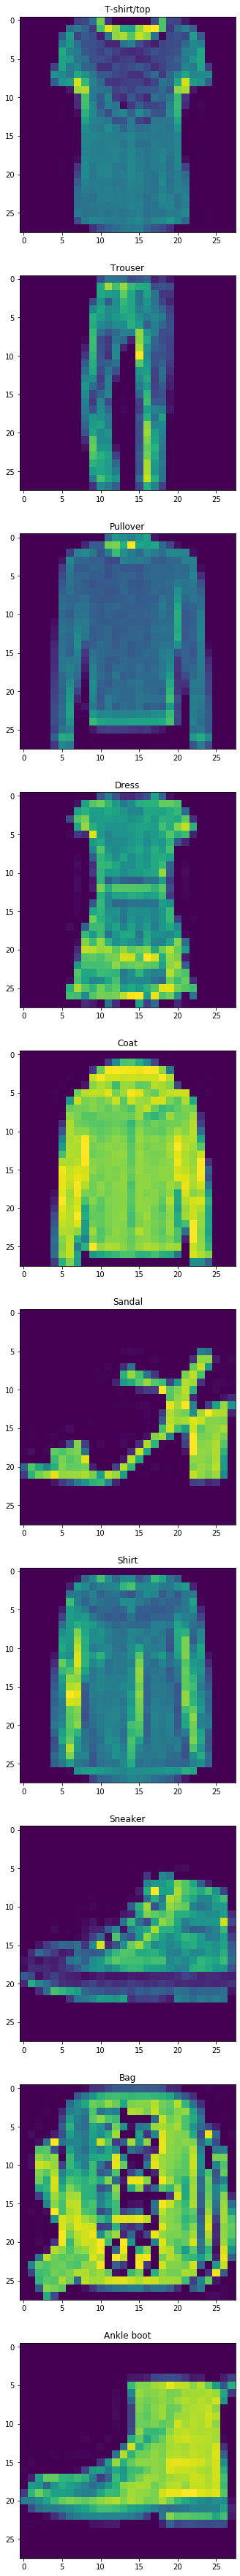

In [6]:
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]
# Index of items in each class
t_shirt = np.where(y_train == 0)[0]
trouser = np.where(y_train == 1)[0]
pullover = np.where(y_train == 2)[0]
dress = np.where(y_train == 3)[0]
coat = np.where(y_train == 4)[0]
sandal = np.where(y_train == 5)[0]
shirt = np.where(y_train == 6)[0]
sneaker = np.where(y_train == 7)[0]
bag = np.where(y_train == 8)[0]
ankle_boot = np.where(y_train == 9)[0]

all_classes = [t_shirt[0], trouser[0], pullover[0], dress[0], coat[0], sandal[0], shirt[0], sneaker[0], bag[0], ankle_boot[0]]

figure = plt.figure(figsize=(64, 64))
for i in range(len(all_classes)):
    figure.add_subplot(10, 1, i+1)
    index = all_classes[i]
    plt.title(fashion_mnist_labels[i])
    plt.imshow(x_train[index])
plt.show()

## Chuẩn hóa dữ liệu  
  
**Chúng ta thực hiện trên cả tập train, validation và tập test**


In [0]:
x_train = x_train/255.0
x_valid = x_valid/255.0
x_test = x_test/255.0


**Reshape dữ liệu đầu vào từ (28, 28) thành (28, 28, 1)**

In [0]:
# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28

x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

print('Training set shape', x_train.shape)
print('Training set: ', x_train.shape[0])
print('Validation set: ', x_valid.shape[0])
print('Test set: ', x_test.shape[0])

Training set shape (55000, 28, 28, 1)
Training set:  55000
Validation set:  5000
Test set:  10000


**Chuyển đầu ra y thành dạng one-hot coding**


In [0]:
# One-hot coding label

y_train = to_categorical(y_train, 10)
y_valid = to_categorical(y_valid, 10)
y_test = to_categorical(y_test, 10)

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Mô hình  
  
**Xây dựng mô hình**
* Conv2D: 32 filters, kernel size 3x3, padding same, stride 1x1, activation function ReLU, initializer he_uniform
* Conv2D: 32 filters, kernel size 3x3, padding same, stride 1x1, activation function ReLU, initializer he_uniform
* Batch Normalization
* MaxPooling2D: pool size 2x2, stride 2x2
* Dropout: rate 0.25  
  
* Conv2D: 64 filers, kernel size 3x3, padding same, stride 1x1, activation function ReLU, initializer he_uniform
* Conv2D: 64 filters, kernel size 3x3, padding same, stride 1x1, activation function ReLU, initializer he_uniform
* Batch Normalization
* MaxPooling2D: pool size 2x2, stride 2x2
* Dropout: rate 0.25  
  
* Conv2D: 128 filters, kernel size 3x3, padding valid, stride 1x1, activation ReLu, initializer he_uniform
* Batch Normalization
* MaxPooling2D: pool size 2x2, stride 2x2
* Dropout: rate 0.25
* Flatten
* Dense: 512 units, activation ReLU
* Dense: 512 units, activation ReLU
* Softmax: 10 classes

In [0]:
# Create model

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496

**Biên dịch mô hình**  
Trước khi cho mô hình chạy, cần phải thiết lập một vài thứ:
  
* Hàm mất mát để dánh giá mô hình, trong trường hợp này sử dụng cross-entropy
  
* Thuật toán tối ưu để mô hình cập nhật các tham số, tôi sử dụng Adam
  
* Metrics để quan sát, đánh giá mô hình 
  
* Sử dụng ModelCheckpoint để lưu mô hình sau mỗi epoch. Thiết lập *save_best_only=True* để lưu mô hình khi validation accuracy tăng

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)

# Fit model
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=50,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 55000 samples, validate on 5000 samples
Epoch 1/50
55000/55000 [==============================] - 31s 566us/step - loss: 0.5030 - acc: 0.8200 - val_loss: 0.3385 - val_acc: 0.8732

Epoch 00001: val_loss improved from inf to 0.33849, saving model to model.weights.best.hdf5
Epoch 2/50
55000/55000 [==============================] - 27s 496us/step - loss: 0.3153 - acc: 0.8832 - val_loss: 0.2662 - val_acc: 0.9044

Epoch 00002: val_loss improved from 0.33849 to 0.26620, saving model to model.weights.best.hdf5
Epoch 3/50
55000/55000 [==============================] - 27s 490us/step - loss: 0.2710 - acc: 0.8991 - val_loss: 0.2390 - val_acc: 0.9140

Epoch 00003: val_loss improved from 0.26620 to 0.23905, saving model to model.weights.best.hdf5
Epoch 4/50
55000/55000 [==============================] - 26s 476us/step - loss: 0.2424 - acc: 0.9098 - val_loss: 0.2273 - val_acc: 0.9200

Epoch 000

**Load model** 

In [0]:
model.load_weights('model.weights.best.hdf5')

## Đánh giá độ chính xác

In [0]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9232


## Dự đoán

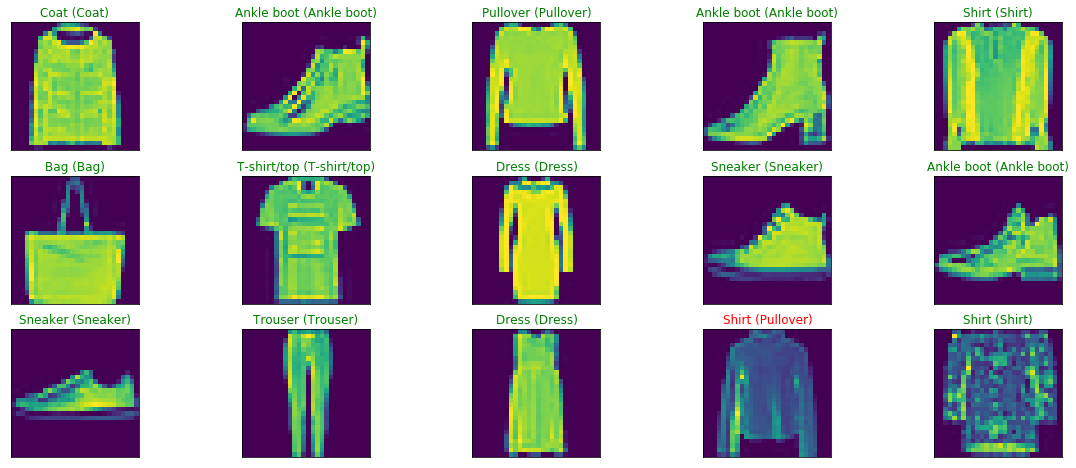

In [0]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

In [1]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, array_to_img


Using TensorFlow backend.


In [0]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

In [5]:
train_x = train_x.reshape(60000, 784)
test_x = test_x.reshape(10000, 784)
print(train_x.shape)
print(test_x.shape)

(60000, 784)
(10000, 784)


In [6]:
# Convert the images into 3 channels
train_x=np.dstack([train_x] * 3)
test_x=np.dstack([test_x]*3)
train_x.shape,test_x.shape

((60000, 784, 3), (10000, 784, 3))

In [7]:
# Reshape images as per the tensor format required by tensorflow
train_x = train_x.reshape(-1, 28,28,3)
test_x = test_x.reshape (-1,28,28,3)
train_x.shape,test_x.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [8]:
# Resize the images 48*48 as required by VGG16
from keras.preprocessing.image import img_to_array, array_to_img
train_x = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in train_x])
test_x = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in test_x])
#train_x = preprocess_input(x)
train_x.shape, test_x.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [0]:
# Normalise the data and change data type
train_x = train_x / 255.
test_x = test_x / 255.
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')

In [0]:
# Converting Labels to one hot encoded format
train_y_one_hot = to_categorical(train_y)
test_y_one_hot = to_categorical(test_y)

In [0]:
from sklearn.model_selection import train_test_split

train_x,valid_x,train_y,valid_y = train_test_split(train_x, train_y_one_hot, test_size=0.2, random_state=13)

In [12]:
# Finally check the data size whether it is as per tensorflow and VGG16 requirement
train_x.shape,valid_x.shape,train_y.shape,valid_y.shape

((48000, 48, 48, 3), (12000, 48, 48, 3), (48000, 10), (12000, 10))

In [0]:
# Define the parameters for instanitaing VGG16 model. 
IMG_WIDTH = 48
IMG_HEIGHT = 48
IMG_DEPTH = 3
BATCH_SIZE = 16

In [0]:
# Preprocessing the input 
train_x = preprocess_input(train_x)
valid_x = preprocess_input(valid_x)
test_x  = preprocess_input (test_x)

In [15]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH))
conv_base.summary()











Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)   

In [16]:
vgg_model = Sequential()
vgg_model.add(conv_base)
vgg_model.add(Flatten())
vgg_model.add(Dense(512, activation='relu'))
vgg_model.add(Dense(512, activation='relu'))
vgg_model.add(Dense(10, activation='softmax'))
vgg_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 15,245,130
Trainable params: 15,245,130
Non-trainable params: 0
_________________________________________________________________


In [17]:
vgg_model.layers[0].trainable = False
for layer in vgg_model.layers:
  print(layer.trainable)

False
True
True
True
True


In [18]:
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='vgg_model.weights.best.hdf5', verbose = 1, save_best_only=True)

# Fit model
vgg_model.fit(train_x,
         train_y,
         batch_size=64,
         epochs=50,
         validation_data=(valid_x, valid_y),
         callbacks=[checkpointer])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 45s 937us/step - loss: 1.6371 - acc: 0.4616 - val_loss: 1.0997 - val_acc: 0.5963

Epoch 00001: val_loss improved from inf to 1.09970, saving model to vgg_model.weights.best.hdf5
Epoch 2/50
48000/48000 [==============================] - 43s 891us/step - loss: 1.0307 - acc: 0.6163 - val_loss: 0.9666 - val_acc: 0.6255

Epoch 00002: val_loss improved from 1.09970 to 0.96655, saving model to vgg_model.weights.best.hdf5
Epoch 3/50
48000/48000 [==============================] - 43s 890us/step - loss: 0.9220 - acc: 0.6578 - val_loss: 0.8557 - val_acc: 0.6768

Epoch 00003: val_loss improved from 0.96655 to 0.85574, saving model to vgg_model.weights.best.hdf5
Epoch 4/50
48000/48000 [==============================] - 43s 890us/step - loss: 0.8648 - acc: 0.6786 - val_loss: 0.8267 - val_acc: 0.69

In [0]:
vgg_model.load_weights('vgg_model.weights.best.hdf5')

In [22]:
# Evaluate the model on test set
score = vgg_model.evaluate(test_x, test_y_one_hot, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7682


In [49]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
print(x[:-4])

[1, 2, 3, 4, 5]


## Tài liệu tham khảo  
1. [Deep learning Coursera, Andrew Ng](https://www.coursera.org/specializations/deep-learning)
2. [Convolutional Neural Networks for Visual Recognition](http://cs231n.stanford.edu/)
3. [Medium Fashion-MNIST with tf.Keras](https://medium.com/tensorflow/hello-deep-learning-fashion-mnist-with-keras-50fcff8cd74a)